In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sn

%matplotlib inline

import plotly.io as pio
pio.renderers.default = 'browser'

# Importing the Dataset
- We will use the "wine-quality" data set created by P.Cortez et al. 
- You can find the data at provided url : 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
- Given dataset has 1600 observations and 12 attributes (including target variable)

In [2]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# wine_df = pd.read_csv(url, sep=";") 

wine_df = pd.read_csv('datasets_4458_8204_winequality-red.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Sneak-peek into the Target Variable Column

In [3]:
'''Check the labels name from target variable column named "quality".'''

wine_df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
'''Check the Distribution of labels (or classes) of Target Varible across the data.'''

label_count = wine_df.groupby('quality').size()
label_count

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

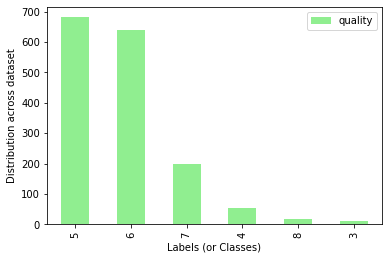

In [5]:
'''Plot the Same Distribution of Target Varible (that we saw above) '''

wine_df["quality"].value_counts().plot.bar(color='lightgreen')
plt.xlabel("Labels (or Classes)")
plt.ylabel("Distribution across dataset")
plt.legend()

## Scatter Plots / Pairwise Plot

In [6]:
'''3-D Scatter Plot of Data'''

fig = px.scatter_3d(wine_df, x='fixed acidity', y='volatile acidity', 
            z='citric acid', color='quality', labels={"class": "quality"})
fig.update_traces(marker=dict(size=13, line=dict(width=1, color='green')), 
                  selector=dict(mode='markers'))
fig.show()

## Drop the target variable column
- Let's drop the target variabe column (ie the last column "quality") from the wine dataframe 
- Because PCA doesn't take into accoun the target attribute.

In [7]:
target_df = pd.DataFrame([], columns=['quality'])
target_df['quality'] = wine_df["quality"]
wine_data = wine_df.drop('quality', axis=1)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Step-1 : Standard Scaling / Z-score Normalization (around μ=0, σ=1)
- When it’s required ?    When features in our data have different ranges or scale.
- Why it’s required ?  those features will contribute unequally to the analysis and will end up creating a bais.


- We will use STANDARD SCALER / Z-score Normalization : 
- Centering and scaling happen independently on each feature.
- Rescaled feature shows gaussian distribution properties : μ=0 and σ=1


- Unlike Min-Max sclaer, Standard scaler is less susceptible to outliers.
- Because Min-Max Scalar scales the data in the range [0,1]. 
- And this bounded range result in smaller standard deviations 
- which in turn suppresses the effect of outliers. 

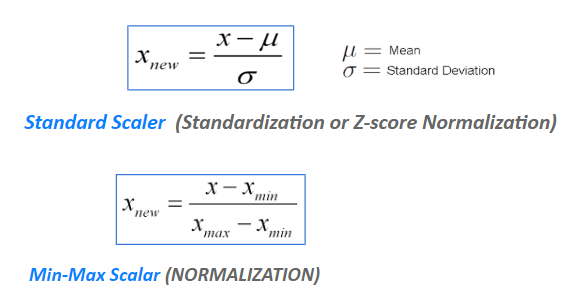

In [8]:
def standardScaler(data):
    '''axis=0 means along the column, axis=1 means working along the row.'''
    scaled_df = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return scaled_df

scaled_df = standardScaler(wine_data)
scaled_df = np.around(scaled_df, 3)
scaled_df


# -============================================================================
# '''If you want, you can also use the SKlearn Standard Scaler as shown below'''
# -============================================================================

# '''Create the Scaler object'''
# scaler_obj = preprocessing.StandardScaler()
# '''Fit our wine data on the scaler object obtained above'''
# scaled_df = scaler_obj.fit_transform(wine_data)
# print("\nScaled dataframe dimension : ", scaled_df.shape)
# scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528,0.962,-1.391,-0.453,-0.244,-0.466,-0.379,0.558,1.289,-0.579,-0.960
1,-0.299,1.967,-1.391,0.043,0.224,0.873,0.624,0.028,-0.720,0.129,-0.585
2,-0.299,1.297,-1.186,-0.169,0.096,-0.084,0.229,0.134,-0.331,-0.048,-0.585
3,1.655,-1.384,1.484,-0.453,-0.265,0.108,0.412,0.664,-0.979,-0.461,-0.585
4,-0.528,0.962,-1.391,-0.453,-0.244,-0.466,-0.379,0.558,1.289,-0.579,-0.960
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.218,0.403,-0.981,-0.382,0.054,1.542,-0.075,-0.979,0.900,-0.461,0.072
1595,-1.390,0.124,-0.878,-0.240,-0.541,2.211,0.138,-0.862,1.353,0.601,0.729
1596,-1.160,-0.100,-0.724,-0.169,-0.244,1.255,-0.197,-0.534,0.706,0.542,0.542
1597,-1.390,0.655,-0.775,-0.382,-0.265,1.542,-0.075,-0.677,1.677,0.306,-0.209


# Step-2 : Computing Covariance Matrix
- N-dimensional dataset always gives a N*N order Covariance Matrix.
- If both variables tend to increase or decrease together, the coefficient is positive. 
- If one variable tends to increase as the other decreases, the coefficient is negative.


In [9]:
def computeCovarianceMatrix(data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance

cov_mat = computeCovarianceMatrix(scaled_df)   # or scaled_df.cov()
cov_mat = np.around(cov_mat,3)
cov_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000,-0.256,0.672,0.115,0.094,-0.154,-0.113,0.668,-0.683,0.183,-0.062
volatile acidity,-0.256,1.000,-0.552,0.002,0.061,-0.011,0.076,0.022,0.235,-0.261,-0.202
citric acid,0.672,-0.552,1.000,0.144,0.204,-0.061,0.036,0.365,-0.542,0.313,0.110
residual sugar,0.115,0.002,0.144,1.000,0.056,0.187,0.203,0.355,-0.086,0.006,0.042
chlorides,0.094,0.061,0.204,0.056,1.000,0.006,0.047,0.201,-0.265,0.371,-0.221
free sulfur dioxide,-0.154,-0.011,-0.061,0.187,0.006,1.000,0.668,-0.022,0.070,0.052,-0.069
total sulfur dioxide,-0.113,0.076,0.036,0.203,0.047,0.668,1.000,0.071,-0.066,0.043,-0.206
density,0.668,0.022,0.365,0.355,0.201,-0.022,0.071,1.000,-0.342,0.148,-0.496
pH,-0.683,0.235,-0.542,-0.086,-0.265,0.070,-0.066,-0.342,1.000,-0.197,0.206
sulphates,0.183,-0.261,0.313,0.006,0.371,0.052,0.043,0.148,-0.197,1.000,0.094


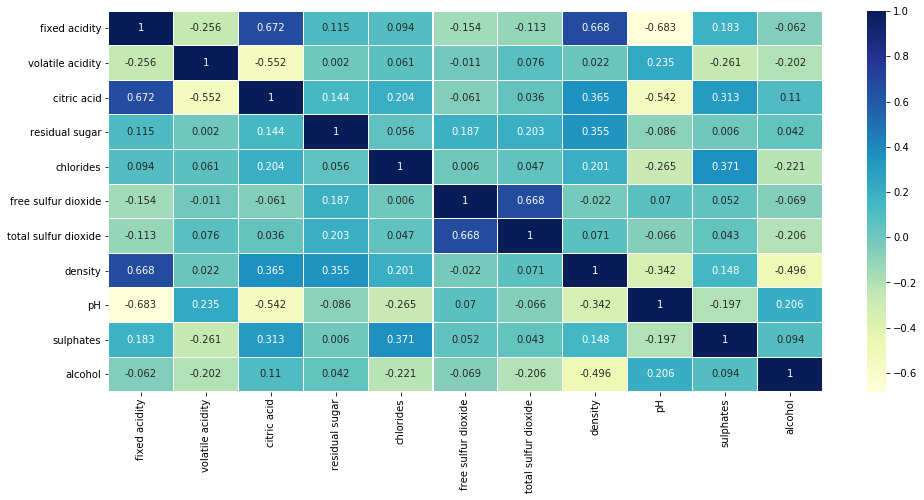

In [10]:
'''Now, Plotting the Covariance Matrix as Heatmap'''

fig = plt.figure(figsize=(16,7))
'''Annotate each cell with the numeric value using integer formatting'''
sn.heatmap(cov_mat, annot=True, fmt='g', linewidths=.1, cmap="YlGnBu")    
plt.show()

# Step-3 : Eigen Decomposition of Covariance Matrix
- NxN order covariance matrix gives "N" eigen vectors and their corresponding "N" eigen values.
- We already know that each PC has two things :
        1.) Eigenvector : tells the direction of the PC (or, direction in which the data is dispersed).
        2.) Eigenvalues : gives variances explained by each PC and their relative importance.
                          (Higher the eigenvalue, more the variation captured & hence more significant that PC is.)

In [11]:
# from numpy.linalg import eig
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('\nNumber of Eigenvectors : %s ' %len(eig_vectors))
print('\nEigenvectors : \n\n%s' %eig_vectors)
print('\nEigenvalues : \n\n%s' %eig_values)


Number of Eigenvectors : 11 

Eigenvectors : 

[[ 0.48927945 -0.110846   -0.1233576  -0.22954383 -0.08230557 -0.64020988
  -0.24902668  0.19422243 -0.17725887 -0.34952803  0.10218237]
 [-0.2384079   0.27416626 -0.45017035  0.07959534  0.21977441 -0.00218488
   0.36471672 -0.12967183 -0.0780587  -0.53357719  0.41239467]
 [ 0.46359759 -0.15157161  0.23828923 -0.07993511 -0.05829834  0.07163759
   0.6213459  -0.38219428 -0.37730951  0.10473897  0.07018113]
 [ 0.14635266  0.27205259  0.10057665 -0.37220287  0.73249216 -0.18379333
   0.09228044  0.00600269  0.30029736  0.29087236  0.04749689]
 [ 0.21239318  0.14781014 -0.0921882   0.66662027  0.24622885 -0.05342956
  -0.216918    0.11155269 -0.35676704  0.37124285  0.3034391 ]
 [-0.03594745  0.51418806  0.42804324 -0.04374622 -0.15871172  0.05019779
   0.25041166  0.63549651 -0.20305287 -0.11628898 -0.01261138]
 [ 0.02370239  0.5699876   0.32151273 -0.03546517 -0.22236927 -0.06754622
  -0.37242149 -0.59128719  0.01714198 -0.09383505  0.136

## Visualize above eigenvectors as a dataframe (or coefficient matrix)
       
- Each PC is a linear combination of all the original variables or attributes : 
        - X_i are the original variables, and 
        - Beta_i are the corresponding weights or so called PCA coefficients.
- Original Variables : 
        ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
- The first row is the coefficients that generated the first PC.
        - PC1 = (fixed acidity * 0.489314) + (volatile acidity * -0.238584) + …....... + (alcohol * -0.113232)
        - Similary PC2 and so on.....

In [12]:
eigenvec_df = pd.DataFrame(eig_vectors) 
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
eigenvec_df.T

,0,1,2,3,4,5,6,7,8,9,10
eigvec_1,0.489279,-0.238408,0.463598,0.146353,0.212393,-0.035947,0.023702,0.395339,-0.438560,0.242872,-0.113341
eigvec_2,-0.110846,0.274166,-0.151572,0.272053,0.147810,0.514188,0.569988,0.232862,0.006912,-0.037518,-0.385689
eigvec_3,-0.123358,-0.450170,0.238289,0.100577,-0.092188,0.428043,0.321513,-0.339363,0.057748,0.280727,0.472051
eigvec_4,-0.229544,0.079595,-0.079935,-0.372203,0.666620,-0.043746,-0.035465,-0.173914,-0.003722,0.550669,-0.122471
eigvec_5,-0.082306,0.219774,-0.058298,0.732492,0.246229,-0.158712,-0.222369,0.156748,0.266888,0.224962,0.351153
eigvec_6,-0.640210,-0.002185,0.071638,-0.183793,-0.053430,0.050198,-0.067546,0.567068,-0.340771,-0.069377,0.314283
eigvec_7,-0.249027,0.364717,0.621346,0.092280,-0.216918,0.250412,-0.372421,-0.239409,-0.009889,0.111371,-0.303489
eigvec_8,0.194222,-0.129672,-0.382194,0.006003,0.111553,0.635497,-0.591287,0.023460,-0.166754,-0.059284,0.039524
eigvec_9,-0.177259,-0.078059,-0.377310,0.300297,-0.356767,-0.203053,0.017142,-0.240121,-0.561982,0.374341,-0.218003
eigvec_10,-0.349528,-0.533577,0.104739,0.290872,0.371243,-0.116289,-0.093835,-0.171057,-0.025936,-0.448253,-0.326398


# Step-4 : Sort the eigenvalues in descending order

In [13]:
indexes = eig_values.argsort()[::-1]   
eig_values = eig_values[indexes] 
eig_vectors = eig_vectors[:, indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]),3), eig_vectors[:,i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])
    
print("\nTotal Variance (sum of all eigenvalues) : ", round(sum(sorted_eigenValues), 3))


Sorted Eigen-pairs (descending order) :

eigenvec_1 : 3.1
eigenvec_2 : 1.925
eigenvec_3 : 1.551
eigenvec_4 : 1.212
eigenvec_5 : 0.96
eigenvec_6 : 0.659
eigenvec_7 : 0.584
eigenvec_8 : 0.423
eigenvec_9 : 0.345
eigenvec_10 : 0.181
eigenvec_11 : 0.06

Total Variance (sum of all eigenvalues) :  11.0


# Step-5 : Decide the value of "K" (optimal no. of PCs)
- PCs are the eigenvectors of a covariance matrix, 

## Method-1 : Kaiser’s Stopping Rule 
- Simply Choose all PCs whose Eigenvalues are greater than 1. 

In [14]:
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 4
Their Eigenvalues are : [3.1, 1.925, 1.551, 1.212]


## Method-2 : Scree Plot 

- We plot a graph b/w PCs Number (X-axis) and its captured Variance or eigenvalues (Y-axis).
- And then we pick the K-value (number of components) where the slope starts flattening. 

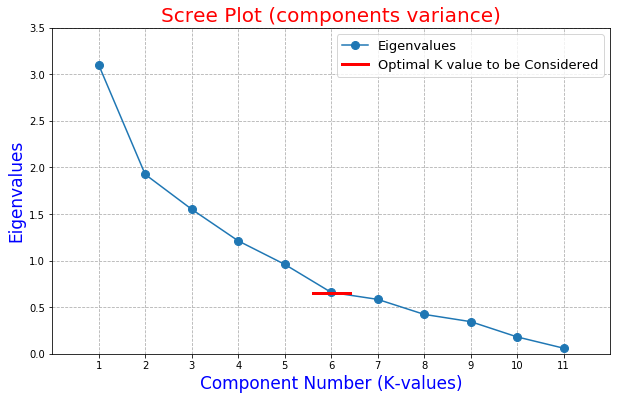

In [15]:
fig = plt.figure(figsize=(10, 6))
plt.title("Scree Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 12, 1))
plt.xlim(0, 12)
plt.ylim(0, 3.5)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 12), sorted_eigenValues, linestyle='-', label="Eigenvalues", marker='o', markersize=8)
plt.plot([5.6, 6.4], [0.65, 0.65], color='red', linestyle='-', lw=3, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})

## Method-3 : Cumulative Variance Plot
- To find the variance explained by each component : We should divide each component’s eigenvalue by the sum of all eigenvalues. 

- To find the cumulative variance explained by a component C3 : We should add the variance explained by components (C1, C2, C3). 
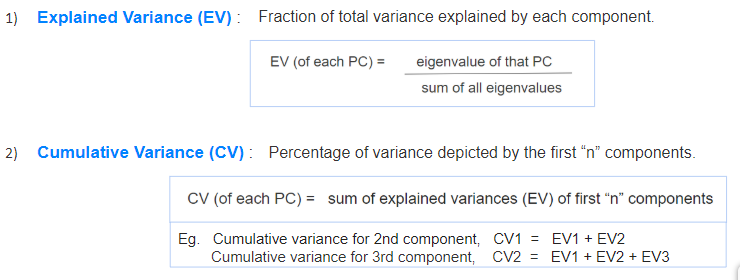

In [16]:
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    # print(ith_explained_variance)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance*100, 3)

print("\nCumulative Variance Percentage : ")
cumulative_variance


Cumulative Variance Percentage : 


{'1': 28.182,
 '2': 45.682,
 '3': 59.782,
 '4': 70.8,
 '5': 79.527,
 '6': 85.518,
 '7': 90.827,
 '8': 94.673,
 '9': 97.809,
 '10': 99.455,
 '11': 100.0}

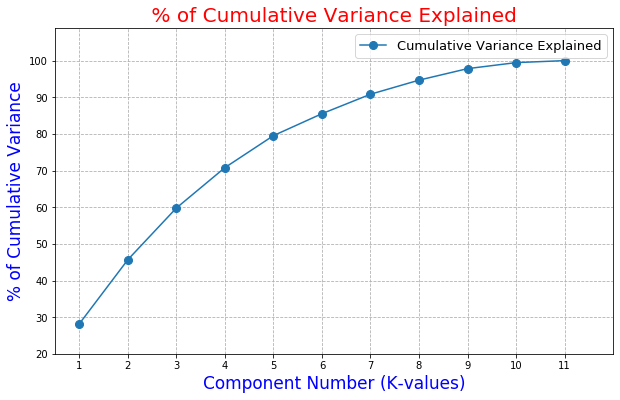

In [17]:
fig = plt.figure(figsize=(10, 6))
plt.title(" % of Cumulative Variance Explained ", color='Red', fontsize=20)
plt.xticks(np.arange(1, 12, 1))
plt.xlim(0.5, 12)
plt.ylim(20, 109) #0.2, 1.2)
plt.ylabel("% of Cumulative Variance", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 12),sorted(cumulative_variance.values()), linestyle='-', label="Cumulative Variance Explained", marker='o', markersize=8)
# plt.plot([5.6, 6.4], [0.65, 0.65], color='red', linestyle='-', lw=3, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})

# Step-6 : Projection matrix construction 
- Based on decided "K" value, the "K" number of eigen vectors placed together will give us Projection matrix.(Pm)

In [18]:
K = 6
projection_matrix = np.array([list(np.hstack(i[1].reshape(11,1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
projection_matrix


Projection-Matrix Dimension ...  (6, 11)


array([[ 0.48927945, -0.2384079 ,  0.46359759,  0.14635266,  0.21239318,
        -0.03594745,  0.02370239,  0.39533918, -0.43855979,  0.24287166,
        -0.11334104],
       [-0.110846  ,  0.27416626, -0.15157161,  0.27205259,  0.14781014,
         0.51418806,  0.5699876 ,  0.23286248,  0.00691224, -0.0375183 ,
        -0.38568907],
       [-0.1233576 , -0.45017035,  0.23828923,  0.10057665, -0.0921882 ,
         0.42804324,  0.32151273, -0.33936283,  0.05774752,  0.28072736,
         0.47205112],
       [-0.22954383,  0.07959534, -0.07993511, -0.37220287,  0.66662027,
        -0.04374622, -0.03546517, -0.17391383, -0.00372203,  0.55066918,
        -0.1224708 ],
       [-0.08230557,  0.21977441, -0.05829834,  0.73249216,  0.24622885,
        -0.15871172, -0.22236927,  0.15674845,  0.26688786,  0.22496154,
         0.35115309],
       [ 0.10218237,  0.41239467,  0.07018113,  0.04749689,  0.3034391 ,
        -0.01261138,  0.1360013 , -0.39134043, -0.52202822, -0.38099984,
         0.361

## Projection Matrix as Dataframe

- Each PC in Projection Matrox depicts an axis of new feature space where we would be projecting our original dataset.
- Original Variables : 
        ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [19]:
projection_matrix_df = pd.DataFrame(projection_matrix) 
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index([pd.Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])])
projection_matrix_df

,1,2,3,4,5,6,7,8,9,10,11
PC1,0.489279,-0.238408,0.463598,0.146353,0.212393,-0.035947,0.023702,0.395339,-0.438560,0.242872,-0.113341
PC2,-0.110846,0.274166,-0.151572,0.272053,0.147810,0.514188,0.569988,0.232862,0.006912,-0.037518,-0.385689
PC3,-0.123358,-0.450170,0.238289,0.100577,-0.092188,0.428043,0.321513,-0.339363,0.057748,0.280727,0.472051
PC4,-0.229544,0.079595,-0.079935,-0.372203,0.666620,-0.043746,-0.035465,-0.173914,-0.003722,0.550669,-0.122471
PC5,-0.082306,0.219774,-0.058298,0.732492,0.246229,-0.158712,-0.222369,0.156748,0.266888,0.224962,0.351153
PC6,0.102182,0.412395,0.070181,0.047497,0.303439,-0.012611,0.136001,-0.391340,-0.522028,-0.381000,0.361602


# Step-7 : Transformation of original dataset to new feature space
- We will transform "N" dimensional orginal dataset "X" to project it into new feature space "Y".
- This will be done using projection matrix "Pm" obtained above.
- Formula : $Y = $X  $*  $(Pm)
- Transformed Data = Feature matrix( or Original dataset) * top k eigenvectors

In [20]:
scaled_df.shape
transformedData = (scaled_df).dot(projection_matrix.T)
transformedData.columns = ['PC'+str(i+1) for i in range(0, K)]
transformedData

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.619425,0.449000,-1.774418,0.045632,0.066437,-0.913874
1,-0.798362,1.854962,-0.913098,0.549877,-0.016838,0.931091
2,-0.748447,0.880393,-1.171989,0.412264,-0.042504,0.401498
3,2.357190,-0.269093,0.242624,-0.930109,-1.499059,-0.129431
4,-1.619425,0.449000,-1.774418,0.045632,0.066437,-0.913874
...,...,...,...,...,...,...
1594,-2.150321,0.816153,0.616381,0.407695,-0.240245,0.056457
1595,-2.213751,0.896332,1.806441,0.412738,0.119411,-0.671533
1596,-1.456238,0.313032,1.124939,0.490842,0.193431,-0.505358
1597,-2.270046,0.981230,0.627705,0.639480,0.067319,-0.857172
